# <center>BYU Pathway tuition fees around the world</center>

BYU Pathway is an initiative from The Church of Jesus Christ of Latter-day Saints which provides higher education with Christian values to people around the world at affordable rates. For more information about the program and how to sign up, visit [their website](https://www.byupathway.org/).

In [1]:
from time import sleep

import geopandas
import pandas as pd
import requests

from bs4 import BeautifulSoup
from country_converter import convert
from matplotlib import pyplot as plt
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

In [2]:
BYU_PATHWAY_JOIN_PAGE = "https://www.byupathway.org/join-us"
TUITION_CLASS_NAME = "Mini-PC-TuitionCalculator-countries"

Use selenium to load the page and wait 5 seconds for it to load all options.

In [3]:
options = Options()
options.headless = True
driver = webdriver.Firefox(options=options)
driver.get(BYU_PATHWAY_JOIN_PAGE)
sleep(5)

Pass the content of the page to Beautiful Soup; find and retrieve tuition values and countries where BYU Pathway is available.

In [4]:
byu_soup = BeautifulSoup(driver.page_source, "html.parser")

tuition_fees = byu_soup.find("select", class_=TUITION_CLASS_NAME)
tuition_by_country = tuition_fees.find_all("option")[1:]

tuitions = [float(tuition["data-cost"]) for tuition in tuition_by_country]
countries = [tuition["value"] for tuition in tuition_by_country]

Convert country names obtained from the website to ISO3 codes, to minimize ambiguity.

In [5]:
countries_iso3 = convert(names=countries, to="ISO3")

tuitions_df = pd.DataFrame.from_dict({
    "iso_a3": countries_iso3,
    "tuition": tuitions,
})

Read low-res world map with country boundaries from Geo Pandas.

In [6]:
world = geopandas.read_file(
    geopandas.datasets.get_path("naturalearth_lowres")
)

Merge data from BYU Pathway with world data from Geo Pandas, keeping only countries already present in the Geo Pandas dataset.

In [7]:
world_with_tuitions = pd.merge(world, tuitions_df, on="iso_a3", how="left")

# World map

A visual presentation of tuition fees by country, with darker colors corresponding to higher tuition fees. Countries in gray are countries were BYU Pathway is not available. Some smaller countries are not represented in the map given their size and the low resolution of the map used.

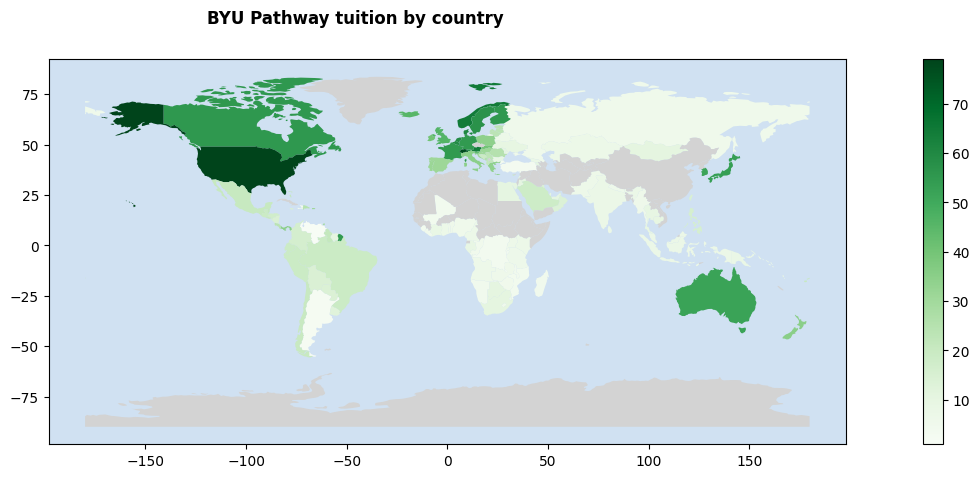

In [8]:
fig, ax = plt.subplots(figsize = (20,5))
fig.suptitle(
    "BYU Pathway tuition by country",
    fontweight="bold"
)
ax.set_facecolor(plt.cm.Blues(.2))

world_with_tuitions.plot(
    column = "tuition",
    cmap = "Greens",
    ax = ax,
    legend = True,
    missing_kwds= dict(color = "lightgrey",)
)

plt.show()

# Ranking

Countries ranked from lower to higher tuition fees, presented in a tabular format.

In [9]:
tabular_results = pd.DataFrame.from_dict({
    "Country": countries,
    "Tuition (USD)": tuitions
})

tabular_results.sort_values(by="Tuition (USD)").style.hide(axis="index").format({"Tuition (USD)": "{:.2f}"})

Country,Tuition (USD)
Venezuela,1.00
Argentina,2.50
Turkey,3.25
Haiti,3.50
Burundi,4.00
Democratic Republic of the Congo,4.00
Mali,4.25
Sierra Leone,4.25
Mozambique,4.50
Malawi,4.75
